# Historical mentions of "quid pro quo" by users on Twitter

In [1]:
import pandas as pd
import geopandas as gpd
import cpi
from urllib.request import urlopen 
import pyarrow
import jenkspy
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np
from altair import datum
import altair as alt
alt.renderers.enable('notebook')
import altair_latimes as lat
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,8)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000
pd.options.display.float_format = '{:,.2f}'.format
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
!rm /Users/mhustiles/data/github/twint/quidproquo/all.json

In [3]:
!cat /Users/mhustiles/data/github/twint/quidproquo/*.json > /Users/mhustiles/data/github/twint/quidproquo/all.json

In [4]:
all = pd.read_json('/Users/mhustiles/data/github/twint/quidproquo/all.json', lines=True)

In [5]:
len(all)

1755125

In [6]:
verified = pd.read_json('/Users/mhustiles/data/github/twint/quidproquo/quidproquo-verified.json', lines=True)

In [7]:
tweets = pd.DataFrame(all.loc[all.astype(str).drop_duplicates().index])

In [8]:
small = pd.DataFrame(tweets.head(1000))

In [9]:
tweets['eastern_created_at'] = tweets['created_at'].dt.tz_localize("GMT").dt.tz_convert('US/Eastern')

In [10]:
tweets['eastern_date_time'] = pd.to_datetime(tweets['eastern_created_at']).dt.strftime('%Y/%m/%d %H:%M')

In [11]:
tweets['eastern_date'] = pd.to_datetime(tweets['eastern_created_at']).dt.strftime('%Y/%m/%d/')
tweets['eastern_time'] = tweets['eastern_created_at'].dt.time
tweets['eastern_date_time'] = pd.to_datetime(tweets.eastern_date_time)
tweets['eastern_date'] = pd.to_datetime(tweets.eastern_date)

In [12]:
tweets['year'] = tweets['eastern_created_at'].dt.year
tweets['month'] = tweets['eastern_created_at'].dt.month
tweets['day'] = tweets['eastern_created_at'].dt.day
tweets['hour'] = tweets['eastern_created_at'].dt.hour
tweets['minute'] = tweets['eastern_created_at'].dt.minute

In [13]:
tweets.day.value_counts()

20    123291
21     64170
4      58441
5      58104
19     57296
22     57278
25     55072
6      52113
18     51964
17     51207
23     49566
13     48476
3      41986
26     40788
2      40282
7      40200
27     39717
24     37946
10     37896
9      37570
15     37030
8      36655
14     35943
12     35626
29     34265
1      33626
28     32192
30     31713
11     31422
16     28565
31     22684
Name: day, dtype: int64

In [14]:
tweets['weekofyear'] = tweets['eastern_created_at'].dt.weekofyear

In [15]:
tweets[['id', 'user_id', 'year', 'conversation_id','month','day','hour','minute','weekofyear']] =\
tweets[['id', 'user_id', 'year', 'conversation_id','month','day','hour','minute','weekofyear']].astype(str)

In [16]:
len(tweets)

1403084

In [17]:
tweets.loc[0]

cashtags                                                             []
conversation_id                                     1199731502965239808
created_at                                          2019-11-27 16:47:34
date                                                2019-11-27 00:00:00
geo                                                                    
hashtags                                                             []
id                                                  1199731502965239814
likes_count                                                           3
link                  https://twitter.com/jhedelstein/status/1199731...
mentions                                                             []
name                                              Jean Hannah Edelstein
near                                                                   
photos                                                               []
place                                                           

In [18]:
tweets.sort_values(by='date', ascending=False).head(5)

cashtags      conversation_id          created_at       date geo  \
692772       []  1208594178491465728 2019-12-22 09:02:31 2019-12-22       
692805       []  1208374887787749376 2019-12-22 08:44:35 2019-12-22       
692803       []  1207607670951288832 2019-12-22 08:45:30 2019-12-22       
692802       []  1208587342879047680 2019-12-22 08:46:13 2019-12-22       
692801       []  1208670074325864448 2019-12-22 08:46:16 2019-12-22       

            hashtags                   id  likes_count  \
692772            []  1208674165143851008            0   
692805            []  1208669649954578432            0   
692803            []  1208669879865348096            0   
692802  [#impotus45]  1208670063370407937            0   
692801            []  1208670074325864448            0   

                                                     link  \
692772  https://twitter.com/GrantRich1973/status/12086...   
692805  https://twitter.com/RobbWuddog/status/12086696...   
692803  https://twitter.com/thatkorverkid/status/12086...   
692802  https://twitter.com/LisaSparreo/status/1208670...   
692801  https://twitter.com/USARebelSway/status/120867...   

                                    mentions  \
692772                 [olkinha, femi_sorry]   
692805        [tigersclayco, repdougcollins]   
692803  [schofnercal, nycountry1, fawfulfan]   
692802                     [realdonaldtrump]   
692801                                    []   

                                      name near photos place quote_url  \
692772                    Grant Richardson          []                   
692805                                  RW          []                   
692803                       Andrew Korver          []                   
692802                        Lisa Sparreo          []                   
692801  USARebelSway: Article V Convention          []                   

        replies_count                                           reply_to  \
692772              1  [{'user_id': '969610203242037250', 'username':...   
692805              0  [{'user_id': '4502717293', 'username': 'RobbWu...   
692803              0  [{'user_id': '2490193266', 'username': 'thatko...   
692802              0  [{'user_id': '714193045084704768', 'username':...   
692801              0  [{'user_id': '4705335097', 'username': 'USAReb...   

        retweet retweet_date retweet_id  retweets_count source      time  \
692772    False                                       0         01:02:31   
692805    False                                       0         00:44:35   
692803    False                                       0         00:45:30   
692802    False                                       0         00:46:13   
692801    False                                       0         00:46:16   

       timezone                                              tweet  \
692772      PST  No saying you can only insure at this level in...   
692805      PST  None of what you just said makes a lick of sen...   
692803      PST  What do you think a quid pro quo is? Just beca...   
692802      PST  Michael Duffy’s emails were very interesting. ...   
692801      PST  DOJ Clears President Trump of Wrongdoing on Uk...   

                                                     urls             user_id  \
692772                                                 []  969610203242037250   
692805                                                 []          4502717293   
692803                                                 []          2490193266   
692802                                                 []  714193045084704768   
692801  [https://joeforamerica.com/doj-clears-trump-wr...          4705335097   

       user_rt user_rt_id       username  video        eastern_created_at  \
692772                     grantrich1973      0 2019-12-22 04:02:31-05:00   
692805                        robbwuddog      0 2019-12-22 03:44:35-05:00   
692803                     thatkorverkid      0 2019-

In [19]:
today = pd.datetime.today().strftime("%m/%d/%Y")

### Isoldate from when sondland texted taylor saying "no quid pro quo" to today

In [20]:
ukraine = tweets[(tweets['date'] > '2019-09-09') & (tweets['date'] < today)]

### Sondland's testimony day

In [21]:
sondland_testimony = tweets[(tweets['eastern_date_time'] > '2019-11-20 00:00:00') \
                            & (tweets['eastern_date_time'] <= '2019-11-20 23:59:59')]

In [22]:
len(sondland_testimony)

85638

---

In [23]:
sept = tweets[(tweets['date'] > '2019-09-09') & (tweets['date'] < '2019-09-30')]

In [24]:
len(ukraine)

883087

In [25]:
sept_dates = sept.groupby(['date', 'hour']).agg('size').reset_index(name='count')

In [26]:
early = sept[sept['tweet'].str.contains('Ukraine')]

In [27]:
early.tail()

cashtags      conversation_id          created_at       date geo  \
1263233       []  1172203012766490624 2019-09-12 18:19:29 2019-09-12       
1263237       []  1172151706701959168 2019-09-12 18:02:55 2019-09-12       
1263430       []  1171760235935125504 2019-09-11 18:27:02 2019-09-11       
1263633       []  1171496425764425728 2019-09-10 18:57:38 2019-09-10       
1263692       []  1171403872570683392 2019-09-10 13:28:22 2019-09-10       

        hashtags                   id  likes_count  \
1263233       []  1172213155226902528            0   
1263237       []  1172208986394742784            0   
1263430       []  1171852669268348928            0   
1263633       []  1171497981473746947            0   
1263692       []  1171415118246240256            6   

                                                      link  \
1263233  https://twitter.com/Mammon_is_God/status/11722...   
1263237  https://twitter.com/DiogenesQuest/status/11722...   
1263430  https://twitter.com/DiogenesQuest/status/11718...   
1263633  https://twitter.com/Mgeotsa/status/11714979814...   
1263692  https://twitter.com/tina_cutsinger/status/1171...   

                                       mentions                        name  \
1263233                               [thehill]                      Mammon   
1263237  [realdonaldtrump, guypbenson, foxnews]            Gregory G. Sarno   
1263430                       [realdonaldtrump]            Gregory G. Sarno   
1263633                       [tomthunkitsmind]  Rule of Law: Impeach Trump   
1263692       [parisbr00506835, donaldjtrumpjr]              Tina Cutsinger   

        near photos place quote_url  replies_count  \
1263233          []                              0   
1263237          []                              0   
1263430          []                              0   
1263633          []                              0   
1263692          []                              1   

                                                  reply_to  retweet  \
1263233  [{'user_id': '819375397666254850', 'username':...    False   
1263237  [{'user_id': '1010620973085675521', 'username'...    False   
1263430  [{'user_id': '1010620973085675521', 'username'...    False   
1263633  [{'user_id': '279369580', 'username': 'Mgeotsa...    False   
1263692  [{'user_id': '822863172310802432', 'username':...    False   

        retweet_date retweet_id  retweets_count source      time timezone  \
1263233                                       0         11:19:29      PST   
1263237                                       0         11:02:55      PST   
1263430                                       0         11:27:02      PST   
1263633                                       0         11:57:38      PST   
1263692                                       0         06:28:22      PST   

                                                     tweet urls  \
1263233  Guliani just asked the Ukraine for dirt on Bid...   []   
1263237  [4th of 5] Rachel Maddow’s 11/30/2018 show exp...   []   
1263430  [4th of 5] Rachel Maddow’s 11/30/2018 show exp...   []   
1263633  Yes & abuse of power, payoff of porn stars (pe...   []   
1263692  When liberal’s start holding their own to acco...   []   

                     user_id user_rt user_rt_id        username  video  \
1263233   819375397666254850                      mammon_is_god      0   
1263237  1010620973085675521                      diogenesquest      0   
1263430  1010620973085675521                      diogenesquest      0   
1263633            279369580                            mgeotsa      0   
1263692   822863172310802432                     tina_cutsinger      0   

               eastern_created_at   eastern_date_time eastern_date  \
1263233 2019-09-12 14:19:29-04:00 2019-09-12 14:19:00   2019-09-12   
1263237 2019-09-12 14:02:55-04:00 2019-09-12 14:02:00   2019-09-12   
1263430 2019-09-11 14:27:02-04:00 2019-09-11 14:27:00   2019-09-11   
1263633 2019-09-10 14:57:38-04:00 2

In [28]:
dates = tweets.groupby(['date', 'hour']).agg('size').reset_index(name='count')

In [29]:
dates.sort_values(by='date', ascending=False).head()

date hour  count
80304 2019-12-22    4     37
80303 2019-12-22    3     84
80291 2019-12-21    2     89
80279 2019-12-21    0    184
80280 2019-12-21    1    107

In [30]:
bigdates = dates[dates['count'] > 100]

In [31]:
bigdates.sort_values(by='count', ascending=False).head()

date hour  count
79537 2019-11-20   10   8921
79538 2019-11-20   11   8742
79541 2019-11-20   14   7471
79540 2019-11-20   13   7446
79539 2019-11-20   12   7287

In [32]:
# alt.Chart(dates).mark_area().encode(
#     x=alt.X('hour:N', axis=alt.Axis(values=(0,12,23)), title="Hour"),
#     y=alt.Y("count:Q", title=" ", axis=alt.Axis(tickCount=5, values=(0,5000,10000,15000), format='~s')),
#     facet=alt.Facet('date:T', title=' ')
# ).properties(width=80, columns=8,height=80, title='Mentions of "quid pro quo" on Twitter')

In [33]:
# alt.Chart(dates).mark_bar().encode(
#     x=alt.X('monthdate(date):T', title="Date"),
#     y=alt.Y("count:Q", title=" ", axis=alt.Axis(tickCount=3, format=',S')),
#     facet=alt.Facet('year(date):N')
# ).properties(width=800, columns=1,height=300, title='Verified mentions of "quid pro quo" on Twitter')

---

### Resampling

In [34]:
tweets.dtypes

cashtags                                  object
conversation_id                           object
created_at                        datetime64[ns]
date                              datetime64[ns]
geo                                       object
hashtags                                  object
id                                        object
likes_count                                int64
link                                      object
mentions                                  object
name                                      object
near                                      object
photos                                    object
place                                     object
quote_url                                 object
replies_count                              int64
reply_to                                  object
retweet                                     bool
retweet_date                              object
retweet_id                                object
retweets_count      

In [35]:
days = tweets.resample('D', on='eastern_created_at').agg('size')
weeks = tweets.resample('W', on = 'eastern_created_at').agg('size')
months = tweets.resample('M', on = 'eastern_created_at').agg('size')

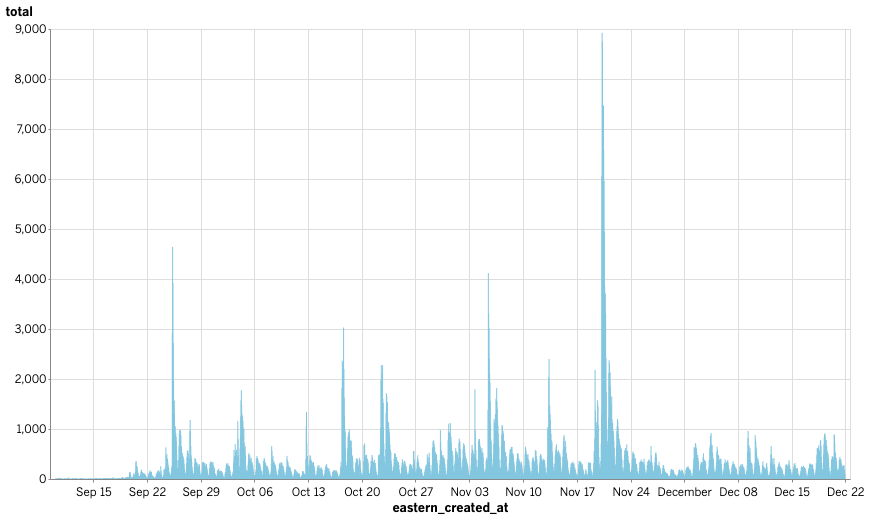

In [36]:
hours = ukraine.resample('H', on = 'eastern_created_at').agg('size').reset_index(name='total')
alt.Chart(hours).mark_bar(size=1).encode(
    x='eastern_created_at',
    y='total'
)

In [37]:
minutes = sondland_testimony.resample('T', on = 'eastern_created_at').agg('size').reset_index(name='total')

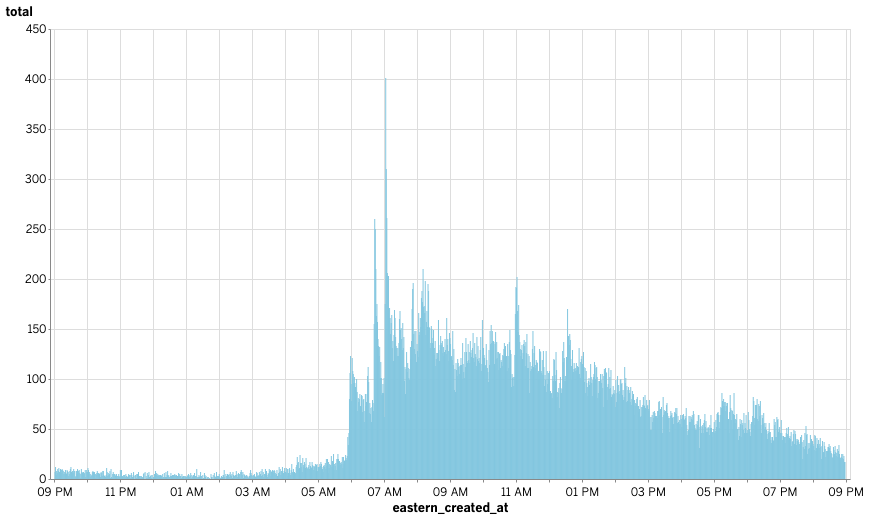

In [38]:
alt.Chart(minutes).mark_bar(size=1).encode(
    x='eastern_created_at',
    y='total'
)

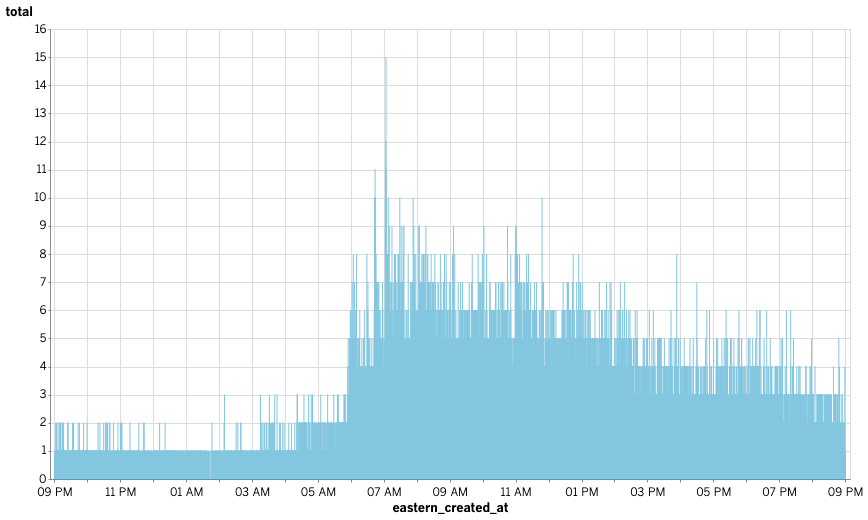

In [40]:
seconds = sondland_testimony.resample('S', on = 'eastern_created_at').agg('size').reset_index(name='total')
alt.Chart(seconds).mark_bar(size=1).encode(
    x='eastern_created_at',
    y='total'
)

In [41]:
sondland_testimony.dtypes

cashtags                                  object
conversation_id                           object
created_at                        datetime64[ns]
date                              datetime64[ns]
geo                                       object
hashtags                                  object
id                                        object
likes_count                                int64
link                                      object
mentions                                  object
name                                      object
near                                      object
photos                                    object
place                                     object
quote_url                                 object
replies_count                              int64
reply_to                                  object
retweet                                     bool
retweet_date                              object
retweet_id                                object
retweets_count      

In [42]:
sondland_testimony[['created_at', 'eastern_created_at']]

created_at        eastern_created_at
1307    2019-11-21 04:57:28 2019-11-20 23:57:28-05:00
1308    2019-11-21 04:53:16 2019-11-20 23:53:16-05:00
1309    2019-11-21 04:51:38 2019-11-20 23:51:38-05:00
1310    2019-11-21 04:51:30 2019-11-20 23:51:30-05:00
1311    2019-11-21 04:51:29 2019-11-20 23:51:29-05:00
1312    2019-11-21 04:51:00 2019-11-20 23:51:00-05:00
1313    2019-11-21 04:50:41 2019-11-20 23:50:41-05:00
1314    2019-11-21 04:50:30 2019-11-20 23:50:30-05:00
1315    2019-11-21 04:50:03 2019-11-20 23:50:03-05:00
1316    2019-11-21 04:50:00 2019-11-20 23:50:00-05:00
1317    2019-11-21 04:50:00 2019-11-20 23:50:00-05:00
1318    2019-11-21 04:49:48 2019-11-20 23:49:48-05:00
1319    2019-11-21 04:48:00 2019-11-20 23:48:00-05:00
1320    2019-11-21 04:41:48 2019-11-20 23:41:48-05:00
1321    2019-11-21 04:41:05 2019-11-20 23:41:05-05:00
1322    2019-11-21 04:41:00 2019-11-20 23:41:00-05:00
1323    2019-11-21 04:37:29 2019-11-20 23:37:29-05:00
1324    2019-11-21 04:32:20 2019-11-20 23:32:20-05:00
1325    2019-11-21 04:30:44 2019-11-20 23:30:44-05:00
1326    2019-11-21 04:30:00 2019-11-20 23:30:00-05:00
1327    2019-11-21 04:24:40 2019-11-20 23:24:40-05:00
1328    2019-11-21 04:23:13 2019-11-20 23:23:13-05:00
1329    2019-11-21 04:19:51 2019-11-20 23:19:51-05:00
1330    2019-11-21 04:17:27 2019-11-20 23:17:27-05:00
1331    2019-11-21 04:16:31 2019-11-20 23:16:31-05:00
1332    2019-11-21 04:15:07 2019-11-20 23:15:07-05:00
1333    2019-11-21 04:14:09 2019-11-20 23:14:09-05:00
1334    2019-11-21 04:14:02 2019-11-20 23:14:02-05:00
1335    2019-11-21 04:12:02 2019-11-20 23:12:02-05:00
1336    2019-11-21 04:10:15 2019-11-20 23:10:15-05:00
1337    2019-11-21 04:07:53 2019-11-20 23:07:53-05:00
1338    2019-11-21 04:05:03 2019-11-20 23:05:03-05:00
1339    2019-11-21 04:02:36 2019-11-20 23:02:36-05:00
1340    2019-11-21 04:02:04 2019-11-20 23:02:04-05:00
1341    2019-11-21 04:00:03 2019-11-20 23:00:03-05:00
1342    2019-11-21 03:59:56 2019-11-20 22:59:56-05:00
1343    2019-11-21 03:57:30 2019-11-20 22:57:30-05:00
1344    2019-11-21 03:57:30 2019-11-20 22:57:30-05:00
1345    2019-11-21 03:56:24 2019-11-20 22:56:24-05:00
1346    2019-11-21 03:51:38 2019-11-20 22:51:38-05:00
1347    2019-11-21 03:46:13 2019-11-20 22:46:13-05:00
1348    2019-11-21 03:46:03 2019-11-20 22:46:03-05:00
1349    2019-11-21 03:46:02 2019-11-20 22:46:02-05:00
1350    2019-11-21 03:39:12 2019-11-20 22:39:12-05:00
1351    2019-11-21 03:36:49 2019-11-20 22:36:49-05:00
1352    2019-11-21 03:35:09 2019-11-20 22:35:09-05:00
1353    2019-11-21 03:35:00 2019-11-20 22:35:00-05:00
1354    2019-11-21 03:32:13 2019-11-20 22:32:13-05:00
1355    2019-11-21 03:30:06 2019-11-20 22:30:06-05:00
1356    2019-11-21 03:29:46 2019-11-20 22:29:46-05:00
1357    2019-11-21 03:24:12 2019-11-20 22:24:12-05:00
1358    2019-11-21 03:20:36 2019-11-20 22:20:36-05:00
1359    2019-11-21 03:18:05 2019-11-20 22:18:05-05:00
1360    2019-11-21 03:14:57 2019-11-20 22:14:57-05:00
1361    2019-11-21 03:14:38 2019-11-20 22:14:38-05:00
1362    2019-11-21 03:13:47 2019-11-20 22:13:47-05:00
1363    2019-11-21 03:11:02 2019-11-20 22:11:02-05:00
1364    2019-11-21 03:10:08 2019-11-20 22:10:08-05:00
1365    2019-11-21 03:08:07 2019-11-20 22:08:07-05:00
1366    2019-11-21 03:06:37 2019-11-20 22:06:37-05:00
1367    2019-11-21 03:05:07 2019-11-20 22:05:07-05:00
1368    2019-11-21 03:03:17 2019-11-20 22:03:17-05:00
1369    2019-11-21 03:03:03 2019-11-20 22:03:03-05:00
1370    2019-11-21 02:59:42 2019-11-20 21:59:42-05:00
1371    2019-11-21 02:57:52 2019-11-20 21:57:52-05:00
1372    2019-11-21 02:54:10 2019-11-20 21:54:10-05:00
1373    2019-11-21 02:52:36 2019-11-20 21:52:36-05:00
1374    2019-11-21 02:52:11 2019-11-20 21:52:11-05:00
1375    2019-11-21 02:50:38 2019-11-20 21:50:38-05:00
1376    2019-11-21 02:48:44 2019-11-20 21:48:44-05:00
1377    2019-11-21 02:47:37 2019-11-20 21:47:37-05:00
1378    2019-11-21 02:43:08 2019-11-20 21:43:08-05:00
1379    2019-11-21 02:40:30 2019-11-20 21:40:30-05:00
1380    2019-11-21 02